# Sentimental Analysis of Amazon Beauty Product Reviews


#Team Members:
* Nermine OURIMI
* Sarah SAFER
* Jihed BEN MOHAMMED
* Nadia CHERIF
* Eya SAFFAR
* Chaker RHIM
* Rania HMIDET

#Notebook Context

Sentimental Analysis is the process of computationally identifying and categorizing statements made from a piece of text and determine whether the author’s feelings toward a particular product is positive, negative or neutral. It is very vital for Industrial leaders like Amazon with their giant E-Commerce business to understand consumer behaviour and their sentiment to reach out better to them. With recent developments in the field of machine learning and text analytics this could be effectively achieved. In this project we aim to predict the sentiment or polarity of a review given to a particular amazon beauty product using supervised machine learning algorithms. Based on that we will compare the performance of each of the approaches used and comment on the best approach for such applications.



#Dataset Description

Dataset is available here :  [https://amazon-reviews-2023.github.io/]

The Dataset used is from the official amazon product data hosted in the link above and is provided by researchers from UCSD. This Review dataset contains the following features in JSON format:

* rating: A number from 1 to 5 indicating the rating of the product.
* text: The text content of the review.
* images: The names of the images associated with the review.
* asin: The product ID (Amazon Standard Identification Number) of the product being reviewed.
* parent_asin: The ID of the parent product (could also be the same as asin).
* userid: The ID of the reviewer.
* timestamp: The time the review was submitted (in Unix time).
* helpful_vote: The helpfulness rating of the review .
* verified_purchase: A boolean or flag indicating whether the purchase was verified.


#Workflow Overview

The steps followed in this colab are :

1. Load the IMDB Dataset
2. Exploratory Data Analysis (EDA)
3. Data Cleaning :

  - Lowercasing
  - Removing HTML tags
  - Removing URLs
  - Removing Emojis
  - Removing punctuation and numbers
  - Removing extra spaces
4. Tokenization
5. Stop Word Removal
6. Lemmatization
7. TF-IDF Vectorization
8. Documentation

## Import libraries


In [ ]:
!pip install nltk matplotlib pandas spacy scikit-learn tqdm gensim


In [ ]:
!pip install num2words

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 7.0 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13704 sha256=8093a94aa6156747ca68f6eb6eba6250f1934cd4500b8b7e7a320f0aa1671e5c
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
nltk.download('words')
nltk.download('maxmet_ne_chunker')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('average_perceptron_tagger')
import spacy
import re
nltk.download('wordnet')
import nltk
from nltk.corpus import wordnet
from nltk import pos_tag as nltk_pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from gensim.models import Word2Vec



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Error loading maxmet_ne_chunker: Package
[nltk_data]     'maxmet_ne_chunker' not found in index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading average_perceptron_tagger: Package
[nltk_data]     'average_perceptron_tagger' not found in index
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from collections import Counter
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import and read the data

In [ ]:
import pandas as pd
import gzip
import json

# Updated function to read a compressed JSON Lines file
def read_jsonl_gz_to_dataframe(file_path):
    # Open the gzip file in read mode
    with gzip.open(file_path, 'rt', encoding='utf-8') as jsonl_file:
        # Read each line and parse as JSON
        data = [json.loads(line) for line in jsonl_file]

    # Convert list of JSON objects to a pandas DataFrame
    df = pd.DataFrame(data)

    return df

file_path = "/content/drive/MyDrive/All_Beauty.jsonl.gz"

df = read_jsonl_gz_to_dataframe(file_path)

# Display the first few rows of the DataFrame
print(df.head())


   rating                                      title  \
0     5.0  Such a lovely scent but not overpowering.   
1     4.0     Works great but smells a little weird.   
2     5.0                                       Yes!   
3     1.0                          Synthetic feeling   
4     5.0                                         A+   

                                                text images        asin  \
0  This spray is really nice. It smells really go...     []  B00YQ6X8EO   
1  This product does what I need it to do, I just...     []  B081TJ8YS3   
2                          Smells good, feels great!     []  B07PNNCSP9   
3                                     Felt synthetic     []  B09JS339BZ   
4                                            Love it     []  B08BZ63GMJ   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B00YQ6X8EO  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588687728923             0   
1  B081TJ8YS3  AGKHLEW2SOWHNMFQIJGBECAF7INQ  1588615855070  

In [ ]:
print(f"This dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

This dataset contains 701528 rows and 10 columns.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   images             701528 non-null  object 
 4   asin               701528 non-null  object 
 5   parent_asin        701528 non-null  object 
 6   user_id            701528 non-null  object 
 7   timestamp          701528 non-null  int64  
 8   helpful_vote       701528 non-null  int64  
 9   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 48.8+ MB


In [ ]:
df.isna().sum()

There is no missing values in these dataset.

## EDA

In [ ]:
df['rating'].value_counts()

,count
rating,
5.0,420726
1.0,102080
4.0,79381
3.0,56307
2.0,43034


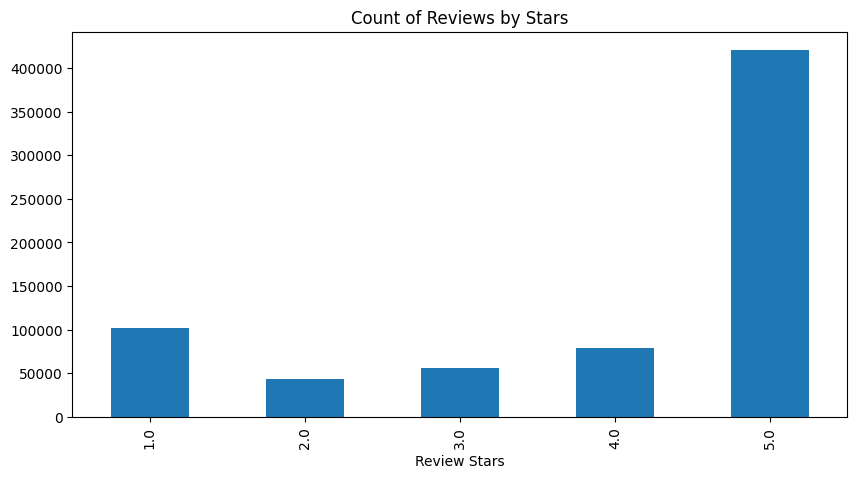

In [ ]:
ax = df['rating'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))

ax.set_xlabel('Review Stars')
plt.show()

The above barplot bar plot shows the distribution of review scores, this helps to visualize the distribution of reviews based on star ratings. It shows that most of the reviews are positive, and the negative reviews are very few.

## Sentiment Analysis

We will focus on subselecting only the textual data from our dataset to prepare for NLP tasks. This involves filtering out non-textual elements and retaining relevant text columns.

In [ ]:
text = pd.DataFrame()
text = df[['text', 'rating']].copy()
text.head()

,text,rating
0,This spray is really nice. It smells really go...,5.0
1,"This product does what I need it to do, I just...",4.0
2,"Smells good, feels great!",5.0
3,Felt synthetic,1.0
4,Love it,5.0


### Data preprocessing

#### Lowercasing

Converting text to lowercase is crucial in natural language processing (NLP) as it standardizes the data, allowing for consistent treatment of words regardless of their casing. This normalization reduces dimensionality, improves matching accuracy, simplifies tokenization, and enhances model performance.

In [ ]:
text['lowercase'] = text['text'].apply(lambda x : x.lower())
text[['text', 'lowercase']].head()

,text,lowercase
0,This spray is really nice. It smells really go...,this spray is really nice. it smells really go...
1,"This product does what I need it to do, I just...","this product does what i need it to do, i just..."
2,"Smells good, feels great!","smells good, feels great!"
3,Felt synthetic,felt synthetic
4,Love it,love it


#### Removing links

Removing links from text is important for several reasons. It reduces clutter, enabling clearer analysis by focusing on relevant content. This practice enhances model accuracy in natural language processing tasks by eliminating distractions, while also preventing external information from biasing results. Additionally, it simplifies preprocessing and improves the overall readability of the text, leading to more effective analysis and modeling outcomes.



In [ ]:
# Removing URLs
text['no_urls'] = text['lowercase'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
print("\nFirst 5 rows after removing URLs:")
text[['text', 'no_urls']].head()


First 5 rows after removing URLs:


,text,no_urls
0,This spray is really nice. It smells really go...,this spray is really nice. it smells really go...
1,"This product does what I need it to do, I just...","this product does what i need it to do, i just..."
2,"Smells good, feels great!","smells good, feels great!"
3,Felt synthetic,felt synthetic
4,Love it,love it


####Removing Mentions

In [ ]:
# Removing Mentions
text['no_mentions'] = text['no_urls'].apply(lambda x: re.sub(r'@\w+', '', x))
print("\nFirst 5 rows after removing mentions:")
text[['text', 'no_mentions']].head()


First 5 rows after removing mentions:


,text,no_mentions
0,This spray is really nice. It smells really go...,this spray is really nice. it smells really go...
1,"This product does what I need it to do, I just...","this product does what i need it to do, i just..."
2,"Smells good, feels great!","smells good, feels great!"
3,Felt synthetic,felt synthetic
4,Love it,love it


####Removing Hashtags

In [ ]:
# Removing Hashtags
text['no_hashtags'] = text['no_mentions'].apply(lambda x: re.sub(r'#', '', x))
print("\nFirst 5 rows after removing hashtags:")
text[['text', 'no_hashtags']].head()



First 5 rows after removing hashtags:


,text,no_hashtags
0,This spray is really nice. It smells really go...,this spray is really nice. it smells really go...
1,"This product does what I need it to do, I just...","this product does what i need it to do, i just..."
2,"Smells good, feels great!","smells good, feels great!"
3,Felt synthetic,felt synthetic
4,Love it,love it


#### Punctuation removal and Special Charcters


In [ ]:
# Removing Punctuation and Special Characters
text['no_punctuation'] = text['no_hashtags'].apply(lambda x :re.sub(r'[^a-zA-Z0-9\s]', ' ', x))
text[['text', 'no_punctuation']].head()

,text,no_punctuation
0,This spray is really nice. It smells really go...,this spray is really nice it smells really go...
1,"This product does what I need it to do, I just...",this product does what i need it to do i just...
2,"Smells good, feels great!",smells good feels great
3,Felt synthetic,felt synthetic
4,Love it,love it


####Emojis Handeling

In [ ]:
import re

# Emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # emoticons
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U00002700-\U000027BF"  # dingbats
    "\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
    "\U00002600-\U000026FF"  # miscellaneous symbols
    "\U00002B50-\U00002B55"  # additional miscellaneous symbols
    "\U0001F191-\U0001F251"  # enclosure characters
    "\U0001F004-\U0001F0CF"  # playing cards
    "\U00002500-\U00002BEF"  # shapes
    "\U0001F018-\U0001F270"  # various symbols
    "\U000024C2-\U0001F251"  # enclosed characters
    "\U0001F600-\U0001F636"  # emoticons
    "]+", flags=re.UNICODE)

# Function to check if a string contains any emojis
def contains_emoji(text):
    return bool(emoji_pattern.search(text))

# Applying the emoji detection function and creating a new column 'contains_emoji'
text['contains_emoji'] = text['text'].apply(contains_emoji)

# Displaying the result
text[['text', 'contains_emoji']].head()


,text,contains_emoji
0,This spray is really nice. It smells really go...,False
1,"This product does what I need it to do, I just...",False
2,"Smells good, feels great!",False
3,Felt synthetic,False
4,Love it,False


Our dataset does not contain emojies to be removed


####Handeling Numbers

In [ ]:
import re
from num2words import num2words# Apply the num2words function to the 'numbers' column

# Helper function to check if a string is a number
def convert_to_words(val):
    # Check if the value is numeric
    if re.match(r'^\d+$', val):  # Matches only integers
        return num2words(int(val))
    return val  # Return original value if it's not a number

# Apply the function to the 'text' column
text['numbers_text'] = text['no_punctuation'].apply(convert_to_words)

# Display the DataFrame with the transformation
text[['text', 'numbers_text']].head()


,text,numbers_text
0,This spray is really nice. It smells really go...,this spray is really nice it smells really go...
1,"This product does what I need it to do, I just...",this product does what i need it to do i just...
2,"Smells good, feels great!",smells good feels great
3,Felt synthetic,felt synthetic
4,Love it,love it


####Remove Extra Spaces and Whitespace

In [ ]:
# Function to remove excessive spaces and newlines
def remove_excess_whitespace(val):
    # Replace multiple spaces, newlines, and tabs with a single space
    cleaned_text = re.sub(r'\s+', ' ', val)
    # Remove leading and trailing spaces
    return cleaned_text.strip()

# Apply the function to the 'text' column
text['cleaned_text'] = text['numbers_text'].apply(remove_excess_whitespace)

# Display the DataFrame with cleaned text
text[['text', 'cleaned_text']].head()

,text,cleaned_text
0,This spray is really nice. It smells really go...,this spray is really nice it smells really goo...
1,"This product does what I need it to do, I just...",this product does what i need it to do i just ...
2,"Smells good, feels great!",smells good feels great
3,Felt synthetic,felt synthetic
4,Love it,love it


#### Tokenization

Tokenization is the process of breaking down text into smaller units called tokens, which can be words, phrases, or symbols. The `word_tokenize` function from `NLTK` is specifically used to tokenize text into words.



In [ ]:
text['tokens'] = text['cleaned_text'].apply(lambda x : word_tokenize(x))
text[['cleaned_text', 'tokens']].head()

,cleaned_text,tokens
0,this spray is really nice it smells really goo...,"[this, spray, is, really, nice, it, smells, re..."
1,this product does what i need it to do i just ...,"[this, product, does, what, i, need, it, to, d..."
2,smells good feels great,"[smells, good, feels, great]"
3,felt synthetic,"[felt, synthetic]"
4,love it,"[love, it]"


#### Stop words removal

Removing stop words involves eliminating commonly used words that do not contribute significant meaning to the text and may add noise to analysis.

In [ ]:
from tkinter import Text
# Define stop words (predefined and custom)
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from tokenized reviews
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply stop word removal on the tokenized reviews
text['filtered_tokens'] = text['tokens'].apply(remove_stopwords)

# Display the reviews after stop word removal
text[['tokens', 'filtered_tokens']].head(10)


,tokens,filtered_tokens
0,"[this, spray, is, really, nice, it, smells, re...","[spray, really, nice, smells, really, good, go..."
1,"[this, product, does, what, i, need, it, to, d...","[product, need, wish, odorless, soft, coconut,..."
2,"[smells, good, feels, great]","[smells, good, feels, great]"
3,"[felt, synthetic]","[felt, synthetic]"
4,"[love, it]",[love]
5,"[the, polish, was, quiet, thick, and, did, not...","[polish, quiet, thick, apply, smoothly, let, d..."
6,"[great, for, many, tasks, i, purchased, these,...","[great, many, tasks, purchased, makeup, remova..."
7,"[these, were, lightweight, and, soft, but, muc...","[lightweight, soft, much, small, liking, would..."
8,"[this, is, perfect, for, my, between, salon, v...","[perfect, salon, visits, using, twice, week, m..."
9,"[i, get, keratin, treatments, at, the, salon, ...","[get, keratin, treatments, salon, least, 3, 4,..."


#### Lemmatization

 This process helps to group similar words together, enhancing the analysis by ensuring that different forms of a word are treated as the same token. For example, "good," "better," and "best" can all be related under a single concept in analysis, providing a clearer picture of sentiment.

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization on the filtered tokens
text['lemmatized_tokens'] = text['filtered_tokens'].apply(lemmatize_tokens)

# Display the reviews after lemmatization
text[['filtered_tokens', 'lemmatized_tokens']].head(10)


,filtered_tokens,lemmatized_tokens
0,"[spray, really, nice, smells, really, good, go...","[spray, really, nice, smell, really, good, go,..."
1,"[product, need, wish, odorless, soft, coconut,...","[product, need, wish, odorless, soft, coconut,..."
2,"[smells, good, feels, great]","[smell, good, feel, great]"
3,"[felt, synthetic]","[felt, synthetic]"
4,[love],[love]
5,"[polish, quiet, thick, apply, smoothly, let, d...","[polish, quiet, thick, apply, smoothly, let, d..."
6,"[great, many, tasks, purchased, makeup, remova...","[great, many, task, purchased, makeup, removal..."
7,"[lightweight, soft, much, small, liking, would...","[lightweight, soft, much, small, liking, would..."
8,"[perfect, salon, visits, using, twice, week, m...","[perfect, salon, visit, using, twice, week, mo..."
9,"[get, keratin, treatments, salon, least, 3, 4,...","[get, keratin, treatment, salon, least, 3, 4, ..."


In [ ]:
output_df = text[['lemmatized_tokens']]

# Specify the file name
output_file = 'lemmatized_tokens.csv'

# Save to CSV
output_df.to_csv(output_file, index=False)

print(f"Lemmatized tokens saved to {output_file}")


Lemmatized tokens saved to lemmatized_tokens.csv


### Feature Extraction

In Natural Language Processing (NLP), feature extraction involves converting raw text data into a structured format that machine learning algorithms can understand. This process helps in identifying relevant information and patterns from the text for various tasks like  sentiment analysis, and more.



> Before moving forward, we need to convert the lemmatized tokens to text format, as TF-IDF and Word2Vec expect strings.



In [ ]:
# Combine lemmatized tokens back to sentences
text['lemmatized_text'] = text['lemmatized_tokens'].apply(lambda x: ' '.join(x))

In [ ]:
text['lemmatized_text'].head()

,lemmatized_text
0,spray really nice smell really good go really ...
1,product need wish odorless soft coconut smell ...
2,smell good feel great
3,felt synthetic
4,love


##### TF-IDF (Term Frequency - Inverse Document Frequency)

**TF-IDF** stands for **Term Frequency-Inverse Document Frequency**. It is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents, or corpus.

#### Purpose
- TF-IDF is commonly used in information retrieval and text mining.
- It helps in identifying the relevance of documents in relation to a search query.
- It can also be used for feature extraction in machine learning applications involving text data.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100, max_df=0.8, min_df=0.01)

# Fit and transform the lemmatized text
tfidf_features = tfidf_vectorizer.fit_transform(text['lemmatized_text'])

# Convert to DataFrame for better visualization
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF features
tfidf_df.head()


,also,amazing,back,best,better,bit,bottle,bought,br,brush,...,used,using,way,wear,week,well,wig,work,would,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.226791,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# Display the feature names (words)
print("Vocabulary:", tfidf_vectorizer.get_feature_names_out())

Vocabulary: ['also' 'amazing' 'back' 'best' 'better' 'bit' 'bottle' 'bought' 'br'
 'brush' 'buy' 'came' 'clean' 'color' 'come' 'could' 'cute' 'day'
 'definitely' 'different' 'dry' 'easy' 'enough' 'even' 'eye' 'face' 'feel'
 'first' 'fit' 'get' 'give' 'go' 'good' 'got' 'great' 'hair' 'hand'
 'happy' 'head' 'hold' 'keep' 'lash' 'last' 'light' 'like' 'little' 'long'
 'look' 'looking' 'lot' 'love' 'made' 'make' 'money' 'much' 'nail'
 'natural' 'need' 'nice' 'oil' 'one' 'perfect' 'pretty' 'price' 'product'
 'purchase' 'put' 'quality' 'really' 'recommend' 'review' 'say' 'scent'
 'see' 'set' 'size' 'skin' 'small' 'smell' 'soft' 'still' 'super' 'take'
 'thick' 'thing' 'time' 'tried' 'try' 'two' 'use' 'used' 'using' 'way'
 'wear' 'week' 'well' 'wig' 'work' 'would' 'year']


##### Word2Vec

**Word2Vec** is a popular technique for converting words into vector representations in a continuous vector space. It captures semantic relationships between words, allowing similar words to have similar vector representations.

- How Word2Vec Works: Word2Vec can be implemented using two main architectures:

  - **Continuous Bag of Words (CBOW)**:
   - Predicts the current word based on its context (the words surrounding it).
   - For example, given the context words "the" and "sat", it might predict the target word "cat".

  - **Skip-gram**:
   - Predicts the context words given a target word.
   - For instance, given the word "cat", it predicts the surrounding words like "the" and "sat".

-  Key Features

  - **Dimensionality Reduction**: Represents words in a lower-dimensional space, making it easier to perform computations.
  - **Semantic Relationships**: Captures relationships such as synonyms (e.g., "king" and "queen") and analogies (e.g., "man" is to "woman" as "king" is to "queen").



In [ ]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd

# Train Word2Vec model
w2v_model = Word2Vec(sentences=text['lemmatized_tokens'], vector_size=50, window=5, min_count=1, workers=4)

# Function to get average word vectors for each review
def average_word_vectors(tokens, model, vector_size):
    # Only consider tokens present in the model vocabulary
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        # Return a vector of zeros if no words are in the model vocabulary
        return np.zeros(vector_size)

# Apply the function to the lemmatized tokens
text['w2v_features'] = text['lemmatized_tokens'].apply(lambda x: average_word_vectors(x, w2v_model, 100))

# Convert the Word2Vec features to DataFrame format for visualization
w2v_df = pd.DataFrame(text['w2v_features'].tolist())

# Display the Word2Vec features
w2v_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.093850,-0.843432,1.066143,0.209277,-0.428691,2.007033,-1.361371,-1.004946,2.542559,0.136375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.399533,-0.631135,0.139635,-0.026251,0.071721,1.181006,0.388259,-1.620203,2.316419,-0.107408,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.635276,-1.008547,0.624048,0.517438,0.205350,2.873042,-0.809843,-2.874689,2.132308,0.626304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.744889,-0.745915,0.664762,1.491956,-0.139402,2.503327,0.893998,-1.211596,0.908377,1.857635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.746980,0.630517,-2.049799,1.043455,-0.828912,1.303673,-1.291735,-1.463828,1.410993,1.201075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####Evaluation: Testing Example on a corpus *sample*

In [ ]:
corpus = text['lemmatized_text'][:5]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_features = tfidf_vectorizer.fit_transform(corpus)

# Convert to DataFrame for easy visualization and extraction
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Get the TF-IDF score for the word 'nice'
if 'nice' in tfidf_vectorizer.get_feature_names_out():
    tfidf_score = tfidf_df['nice']
    print("TF-IDF Scores for the word 'nice' in each document:\n", tfidf_score)
else:
    print("The word 'nice' is not in the TF-IDF vocabulary.")




> The TF-IDF score of "nice" is 0.164283 in the first document, and 0.000000 in the other four documents.
This means that the word "nice" appears in the first document, and it is considered relevant based on its frequency. However, it does not appear in the other four documents, resulting in a score of zero.

> The TF-IDF value reflects the **importance** of the word "nice" in each document relative to the rest of the corpus.



In [ ]:

# Tokenize the sentences
corpus_tokens = [word_tokenize(sentence.lower()) for sentence in corpus]

# Train Word2Vec model on the tokenized corpus

word2vec_model = Word2Vec(sentences=corpus_tokens, vector_size=50, window=5, min_count=1)


# Get the vector representation for the word 'nice'
product_vector = word2vec_model.wv['nice']

# Display the vector representation for 'nice'
print("Word Embedding for 'nice':\n", product_vector)



In [ ]:
# prompt: use Glove on this model

import numpy as np
# Download the GloVe embeddings (you only need to do this once)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Load the GloVe embeddings into a dictionary
embeddings_dict = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

# Function to create a GloVe embedding matrix for our dataset
def create_glove_embedding_matrix(lemmatized_tokens, embeddings_dict, embedding_dim):
  embedding_matrix = np.zeros((len(lemmatized_tokens), embedding_dim))
  for i, word in enumerate(lemmatized_tokens):
    if word in embeddings_dict:
      embedding_matrix[i] = embeddings_dict[word]
  return embedding_matrix


# Assuming 'text' is your DataFrame with the lemmatized tokens

# Create a vocabulary of unique words from your dataset
vocabulary = set()
for tokens in text['lemmatized_tokens']:
    for token in tokens:
        vocabulary.add(token)

# Create a word-to-index mapping
word_to_index = {word: index for index, word in enumerate(vocabulary)}

# Now, create the embedding matrix using the function
embedding_dim = 100  # Assuming you are using GloVe 100d vectors
embedding_matrix = create_glove_embedding_matrix(list(vocabulary), embeddings_dict, embedding_dim)


--2024-10-10 02:01:55--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-10 02:01:55--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-10 02:01:55--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

> The Word2Vec embedding is a 50-dimensional vector representation of the word "nice". Each value in the vector is a floating-point number.
These values represent the **position** of "nice" in the learned vector space, capturing relationships with other words.

> Words with similar meanings are positioned closer in this vector space. For example, "nice" will be close to words like "pleasant" or "kind" if the Word2Vec model has learned these relationships.

####Conclusion

| Key Differences   | TF-IDF                              | Word2Vec                                  |
|-------------------|-------------------------------------|-------------------------------------------|
| **Nature of Representation** | Scalar value representing word importance in a document. | High-dimensional vector capturing word's semantic meaning. |
| **Context**       | Does not understand word meaning; only considers word frequency. | Understands word context via co-occurrences, capturing semantic relationships. |
| **Dimensionality** | Single value per word per document. | Vector with multiple dimensions (e.g., 50) representing word meaning. |
| **Use Case**      | Information retrieval to understand word importance in a document. | Semantic analysis, similarity calculations, and classification tasks. |



# Final Conclusion

In this notebook, we explored various steps involved in data preprocessing for sentiment analysis, including **text cleaning, tokenization, stop word removal, and lemmatization**. We also conducted feature extraction using two popular methods: **TF-IDF** and **Word2Vec**.

The preprocessing steps allowed us to prepare the data for effective feature extraction, making the data more suitable for sentiment analysis tasks. We then compared **TF-IDF** and **Word2Vec** as feature extraction techniques:

- **TF-IDF**: This method assigns scalar importance to words based on their frequency in the document relative to the entire corpus. It is effective for capturing document-level importance, which helps in understanding which words are most important in individual documents.

- **Word2Vec**: This method generates dense, high-dimensional embeddings for words, capturing their semantic meaning based on the context in which they appear. This helps understand relationships between similar words and is useful for tasks requiring semantic analysis.

In conclusion, the choice between TF-IDF and Word2Vec depends on the specific requirements of the task at hand. For tasks where document-level word importance is critical, **TF-IDF** can be highly effective. On the other hand, for tasks requiring a deeper understanding of semantic relationships between words, **Word2Vec** provides a more nuanced representation. This evaluation provides valuable insights into the trade-offs of each method, guiding the choice of feature extraction technique for future sentiment analysis projects.